In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as colors
import matplotlib.cbook as cbook

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from pylab import rc
from matplotlib import gridspec
from matplotlib import transforms
from matplotlib import colors
from scipy.stats import gaussian_kde
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
from astropy import units as u

In [12]:
HRDF

,0,1,2,3,4,5,6,7,8
0,4.978310e+18,4.491332,-46.679891,2.3398,18.4080,18.3302,18.6794,4.49133217362-46.67989092371,-999.000000
1,4.295770e+17,4.493799,61.164089,3.5902,18.7426,18.7779,18.7847,4.49379900209+61.16408859153,-999.000000
2,4.997940e+18,4.495156,-39.302192,4.9712,18.6243,18.6431,18.5769,4.49515639136-39.3021918556,-999.000000
3,2.863390e+18,4.498832,32.763386,5.8696,18.1137,18.1791,18.0332,4.49883223358+32.76338580063,-999.000000
4,2.856440e+18,4.502166,26.360657,2.4011,18.4726,18.5346,18.4311,4.5021660119+26.3606566224,-999.000000
...,...,...,...,...,...,...,...,...,...
21729,4.822340e+18,80.177205,-36.269871,7.4840,16.3926,16.3186,16.5726,80.17720512663-36.26987112801,0.000002
21730,4.657950e+18,80.178279,-69.993727,0.6944,18.8182,18.6758,18.6239,80.17827919312-69.99372678826,-999.000000
21731,3.394450e+18,80.180419,17.080086,5.0546,18.7389,18.8071,18.7124,80.18041908236+17.08008612982,-999.000000
21732,4.658170e+18,80.182587,-69.607499,0.4269,18.4627,18.4614,18.5305,80.18258720048-69.60749906861,-999.000000


In [16]:
HRDFClean

,0,1,2,3,4,5,6,7,8
9,2.323210e+18,4.518694,-26.605586,5.4687,17.0272,16.9450,17.1989,4.5186940188-26.60558636658,1.000000
10,4.906460e+18,4.523726,-59.132203,20.5101,17.3049,17.5518,16.9147,4.52372642767-59.13220278287,1.000000
11,2.741460e+18,4.529505,5.159460,6.4084,17.2930,17.3332,17.2199,4.52950525361+5.1594599512,0.999994
12,4.703340e+18,4.538360,-68.855330,8.9656,16.3279,16.2883,16.4505,4.53836004434-68.85532968488,0.811257
19,4.997930e+18,4.573309,-39.396902,6.0769,17.3703,17.3703,17.4641,4.573309477-39.39690209378,1.000000
...,...,...,...,...,...,...,...,...,...
21683,1.875760e+17,80.109816,38.211059,13.4028,15.3686,15.2695,15.5272,80.10981616533+38.21105895036,0.000000
21695,2.906510e+18,80.126318,-28.819703,8.5287,16.7495,16.7420,16.8254,80.12631762758-28.81970317324,0.999990
21713,3.221730e+18,80.152277,0.624630,8.8001,16.7109,16.6973,16.7905,80.15227661254+0.62462964057,1.000000
21716,3.446910e+18,80.159948,30.806101,17.5116,15.5794,15.5909,15.5885,80.1599484485+30.80610140064,0.008246


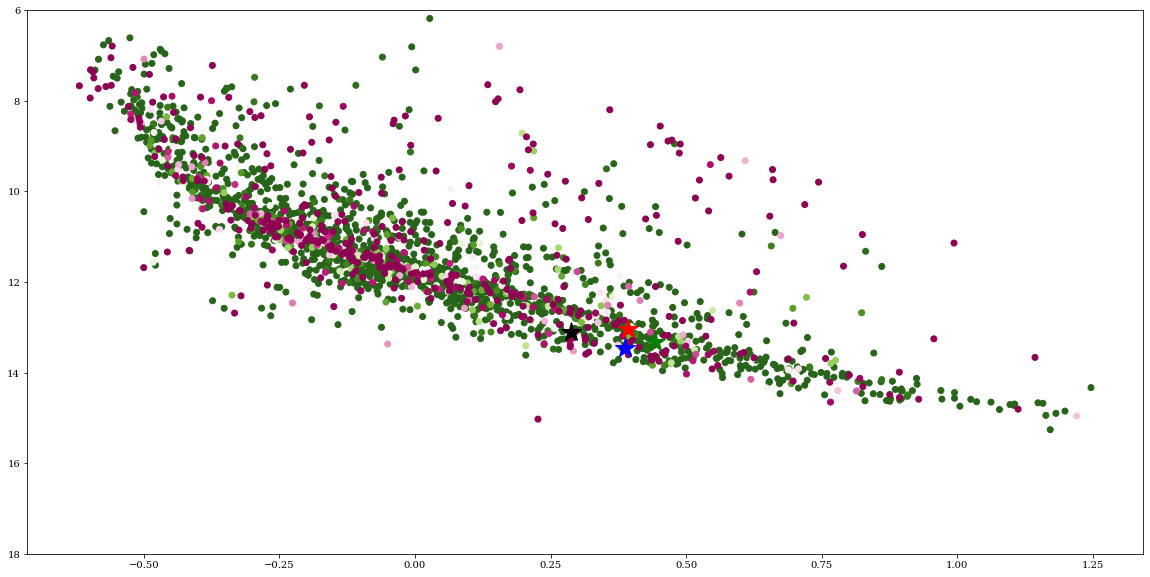

In [43]:
#reding 77pc
#gd 356 20 pc
#j1219 70pc
#j1252 77pc

HRDF = pd.read_csv('forHRTESSFilled.csv',sep=',',header=None)
gmag = HRDF[4].to_numpy()
bpmag = HRDF[5].to_numpy()
rpmag = HRDF[6].to_numpy()
parallax = HRDF[3].to_numpy()
gmag = gmag + 5*(np.log10(parallax/1000)+1)
plt.figure(figsize=(20,10))
#plt.plot(bpmag-rpmag, gmag, c='gray', marker=',', ls='')
plt.ylim(18,6)

HRDFClean = HRDF[HRDF[8] != -999]
HRDFCleanS = HRDFClean.sort_values(by=[8], ascending=True)
gmag = HRDFCleanS[4].to_numpy()
bpmag = HRDFCleanS[5].to_numpy()
rpmag = HRDFCleanS[6].to_numpy()
parallax = HRDFCleanS[3].to_numpy()
proba = HRDFCleanS[8].to_numpy()
gmag = gmag + 5*(np.log10(parallax/1000)+1)
#cm = plt.cm.get_cmap('seismic')
cm = plt.cm.get_cmap('PiYG')
sortIndi = proba.argsort()[::-1][:len(proba)]
probaS = proba[sortIndi]
bpmagS = bpmag[sortIndi]
rpmagS = rpmag[sortIndi]
gmagS = gmag[sortIndi]
plt.scatter(bpmagS-rpmagS, gmagS, c=probaS, marker='o', cmap=cm)
#plt.xlim(0,1)
#plt.ylim(14,10)
wd1219GMAG = 17.561228 + 5*(np.log10(14.2774/1000)+1)
wd1252GMAG = 17.477457+ 5*(np.log10(12.9437/1000)+1)
plt.plot([0.388],[13.46],'b*',label='GD 356',ms=20)
plt.plot([17.582787-17.189125], [wd1252GMAG], 'r*',label="J1252",ms=20)#WDJ125230.93-023417.72
plt.plot([17.673635-17.231398],[wd1219GMAG],'g*', label="J1219",ms=20)#WDJ121929.50+471522.94

plt.plot([0.287],[13.10],'k*',label='J0412',ms=20)#WDJ041246.85+754942.26


In [22]:
HRDFClean

,0,1,2,3,4,5,6,7,8
9,2.323210e+18,4.518694,-26.605586,5.4687,17.0272,16.9450,17.1989,4.5186940188-26.60558636658,1.0
11337,5.078070e+18,45.652789,-23.030935,12.6382,15.6577,15.5555,15.8756,45.65278918366-23.03093500966,1.0
11471,1.087080e+17,46.419856,21.391009,5.3291,16.8255,16.7269,17.0152,46.41985560042+21.3910085557,1.0
11434,3.047290e+16,46.188789,13.741708,5.5033,17.6163,17.6226,17.6646,46.18878883384+13.74170840306,1.0
11433,5.047860e+18,46.176234,-35.269212,13.3343,17.1430,17.2152,17.0139,46.17623403235-35.26921174824,1.0
...,...,...,...,...,...,...,...,...,...
2508,5.031700e+18,12.907199,-30.715474,0.9073,14.3410,14.2048,14.5973,12.90719880905-30.71547420434,0.0
14605,4.681730e+18,62.639044,-58.867634,1.5174,17.5680,17.5066,17.6524,62.63904449533-58.86763428281,0.0
12476,5.168130e+18,51.414367,-8.245250,4.5330,17.6705,17.7467,16.9218,51.41436683827-8.24525032781,0.0
21462,4.652120e+18,79.800725,-70.299049,0.4679,18.8461,18.8471,18.7176,79.80072530462-70.29904931517,-99.0


In [2]:
HRDF = pd.read_csv('forHR.tsv',sep='\t',header=None)

#'umag','sgmag','srmag','simag','szmag','prob','teff','logh','mass','teff2','logh2','mass2','rai','dei'
HRDF[10].replace('         ', np.nan, inplace=True)
HRDF[11].replace('         ', np.nan, inplace=True)
HRDF[12].replace('         ', np.nan, inplace=True)
HRDF[7].replace('         ', np.nan, inplace=True)


HRDF[21].replace('         ', np.nan, inplace=True)#logg
HRDF[20].replace('             ', np.nan, inplace=True)#teff
HRDF[22].replace('             ', np.nan, inplace=True)#mass

HRDF = HRDF[HRDF[10].notna()]
HRDF = HRDF[HRDF[11].notna()]
HRDF = HRDF[HRDF[12].notna()]
HRDF = HRDF[HRDF[7].notna()]
HRDF = HRDF[HRDF[21].notna()]
HRDF = HRDF[HRDF[20].notna()]
HRDF = HRDF[HRDF[22].notna()]

gmag = HRDF[10].to_numpy()
bpmag = HRDF[11].to_numpy()
rpmag = HRDF[12].to_numpy()
parallax = HRDF[7].to_numpy()
logg = HRDF[21].to_numpy()
teff = HRDF[20].to_numpy()
mass = HRDF[22].to_numpy()

#JJTimes = (JJDF['Time'].to_numpy()/60/60/24)+2459076.6992445
#print(JJDF)

In [3]:
logg = np.array(logg, dtype=float)
mass = np.array(mass, dtype=float)
teff = np.array(teff, dtype=float)

In [28]:
#gd356 = [8.22,0.733,7698]
#reding = [7.98,0.583,7856]
#boris = [8.09,0.649,7500]
#tremblay = [8.25,0.755,8582]
specialg = np.array([8.22,7.98,8.09,8.25])
specialMass = np.array([0.733,0.583,0.649,0.755])
specialT = np.array([7698,7856,7500,8582])

In [32]:
specialg


array([8.22, 7.98, 8.09, 8.25])

In [33]:
specialMass

array([0.733, 0.583, 0.649, 0.755])

In [34]:
specialT

array([7698, 7856, 7500, 8582])

In [47]:
lumEst(8.253,0.755,8580)

-3.2483418149119756

In [46]:
def lumEst(logg,mass,teffIn):
    justg = (10**logg)*10
   
    solarMass = 1.98847*(10**30)
    bigG = 6.67408 * (10**(-11))
    radiusIn = np.sqrt(bigG*mass*solarMass/justg)

    stefBolt = 5.6704*(10**(-5))
    lum = (teffIn**4)*4*np.pi*stefBolt*radiusIn*radiusIn

    lum = np.log10(lum/(3.828*(10**26)))

    return lum

In [37]:
print(logg[:4])
print(teff[:4])

[9.289436 8.331937 8.232322 7.797923]
[31020.675959  5584.125577  6399.129829  5174.524282]


In [44]:
populationLum = lumEst(logg,mass,teff)
#print('==============================')
specialLum = lumEst(specialg,specialMass,specialT)
print(specialLum)

[ 95718.45119432 222219.3413914  239221.27510139 ... 352679.01333141
 254153.00488343 295922.63710029]
[6.04532862e+24 3.42143250e+22 6.83764970e+22 ... 1.87192081e+22
 8.84790789e+22 5.65952396e+22]
[242106.92566115 284635.78725161 264592.5269868  237371.56955303]
[-2.06020264e+15  1.51979261e+16 -8.90543533e+15  1.37010968e+16]
[        nan -10.4011876         nan -10.4462166]


D:\conda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


In [27]:
specialLum

array([        nan, -10.4011876,         nan, -10.4462166])

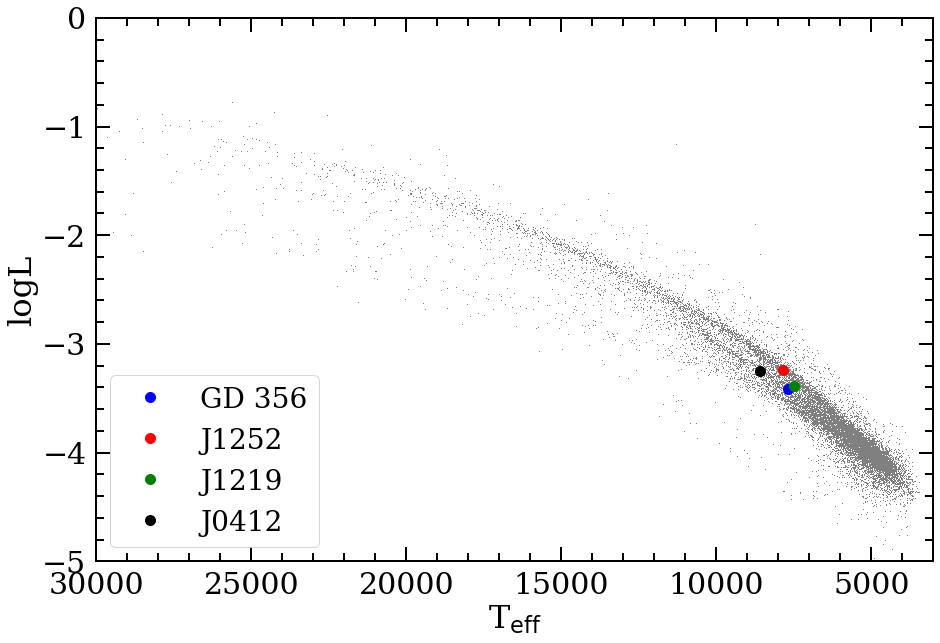

In [49]:
fig, axs = plt.subplots(1, 1,figsize=(15,10))
from pylab import *
rc('axes', linewidth=2)
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
axs.plot(teff, populationLum, marker=',',ls='',c='gray')
specialg = np.array([8.22,7.98,8.09,8.25])
specialMass = np.array([0.733,0.583,0.649,0.755])
specialT = np.array([7698,7856,7500,8582])

axs.plot([7698],[lumEst(8.22,0.733,7698)],'bo',label='GD 356',ms=10)
axs.plot([7856], [lumEst(7.98,0.583,7856)], 'ro',label="J1252",ms=10)#WDJ125230.93-023417.72
axs.plot([7500],[lumEst(8.09,0.649,7500)],'go', label="J1219",ms=10)#WDJ121929.50+471522.94
axs.plot([8582],[lumEst(8.25,0.755,8582)],'ko',label='J0412',ms=10)#WDJ041246.85+754942.26
axs.legend(prop={'size': 28},loc='best')
axs.set_ylim(-5,0)
axs.set_xlim(30000,3000)
axs.set_ylabel(r"logL", fontsize=32)
axs.set_xlabel(r"T$_{\rm eff}$", fontsize=32)

axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
#axs.yaxis.set_major_locator(MultipleLocator(0.06))
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in")
axs.tick_params(axis='x',which='both', width=2,direction='in')
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
#axs.yaxis.set_major_locator(MultipleLocator(2))
#axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.tick_params(axis='x',which='minor', length=8)
axs.tick_params(axis='y',which='minor', length=8,direction='in')
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
    

bboxx = transforms.Bbox([[0.58, 0.24], [13.56, 8.98]])#285->288 #15.15->
plt.savefig('HRLTeff.pdf', bbox_inches=bboxx ) 

In [19]:
lum

array([3.04019101e-05, 1.72063572e-07, 3.43864866e-07, ...,
       9.41387506e-08, 4.44960592e-07, 2.84617015e-07])

In [2]:
HRDF = pd.read_csv('forHR.tsv',sep='\t',header=None)

#'umag','sgmag','srmag','simag','szmag','prob','teff','logh','mass','teff2','logh2','mass2','rai','dei'
HRDF[10].replace('         ', np.nan, inplace=True)
HRDF[11].replace('         ', np.nan, inplace=True)
HRDF[12].replace('         ', np.nan, inplace=True)
HRDF[7].replace('         ', np.nan, inplace=True)
HRDF = HRDF[HRDF[10].notna()]
HRDF = HRDF[HRDF[11].notna()]
HRDF = HRDF[HRDF[12].notna()]
HRDF = HRDF[HRDF[7].notna()]
gmag = HRDF[10].to_numpy()
bpmag = HRDF[11].to_numpy()
rpmag = HRDF[12].to_numpy()
parallax = HRDF[7].to_numpy()
#JJTimes = (JJDF['Time'].to_numpy()/60/60/24)+2459076.6992445
#print(JJDF)

In [3]:
gmag = gmag + 5*(np.log10(parallax/1000)+1)
wd1219GMAG = 17.561228 + 5*(np.log10(14.2774/1000)+1)
wd1252GMAG = 17.477457+ 5*(np.log10(12.9437/1000)+1)
gd1400Gmag = 15.210746+ 5*(np.log10(21.620698589136726/1000)+1)

In [5]:
gd1400Gmag

11.88509461194068

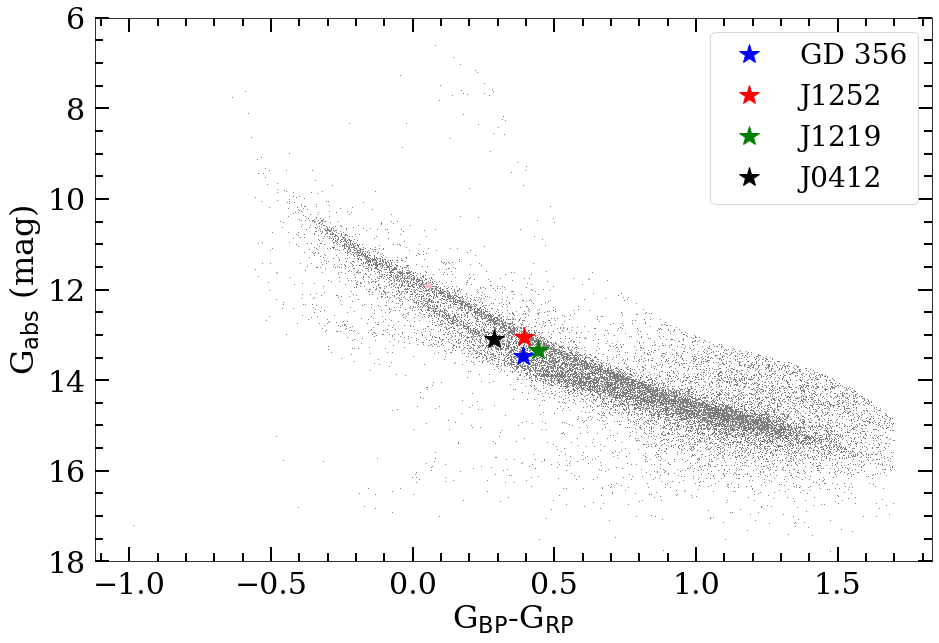

In [4]:
fig, axs = plt.subplots(1, 1,figsize=(15,10))
from pylab import *
rc('axes', linewidth=2)
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
axs.plot(bpmag-rpmag, gmag, marker=',',ls='',c='gray')
axs.plot([0.388],[13.46],'b*',label='GD 356',ms=20)
axs.plot([17.582787-17.189125], [wd1252GMAG], 'r*',label="J1252",ms=20)#WDJ125230.93-023417.72
axs.plot([17.673635-17.231398],[wd1219GMAG],'g*', label="J1219",ms=20)#WDJ121929.50+471522.94
axs.plot([0.053510666],[gd1400Gmag], c='pink', marker='^')
axs.plot([0.287],[13.10],'k*',label='J0412',ms=20)#WDJ041246.85+754942.26
#axs.gca().invert_yaxis()
axs.legend(prop={'size': 28},loc='best')
axs.set_ylim(18,6)
axs.set_ylabel(r"G$_{\rm abs}$ (mag)", fontsize=32)
axs.set_xlabel(r"G$_{\rm BP}$-G$_{\rm RP}$", fontsize=32)

axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
#axs.yaxis.set_major_locator(MultipleLocator(0.06))
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in")
axs.tick_params(axis='x',which='both', width=2,direction='in')
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
axs.yaxis.set_major_locator(MultipleLocator(2))
axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.tick_params(axis='x',which='minor', length=8)
axs.tick_params(axis='y',which='minor', length=8,direction='in')
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
    

bboxx = transforms.Bbox([[0.66, 0.24], [13.56, 8.98]])#285->288 #15.15->
#plt.savefig('100PcSample.pdf', bbox_inches=bboxx ) 

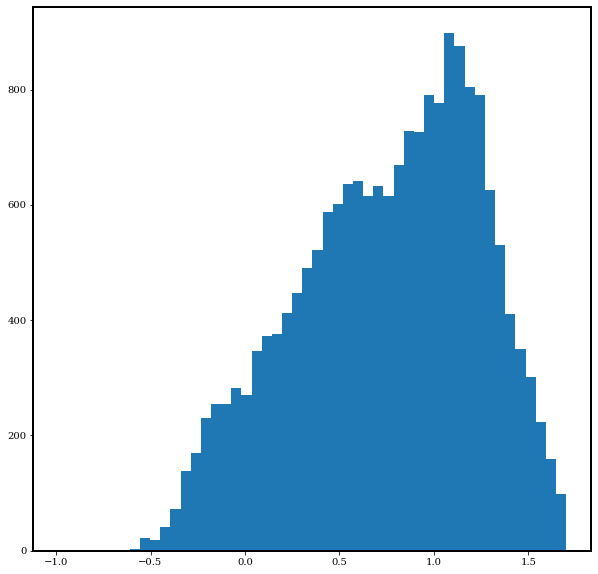

In [6]:
plt.figure(figsize=(10,10))
plt.hist(bpmag-rpmag, bins=50)
x= bpmag-rpmag

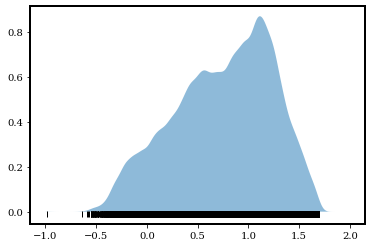

In [7]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=.04, kernel='gaussian')
kde.fit(x[:, None])
x_d = np.linspace(-1,2,2000)
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

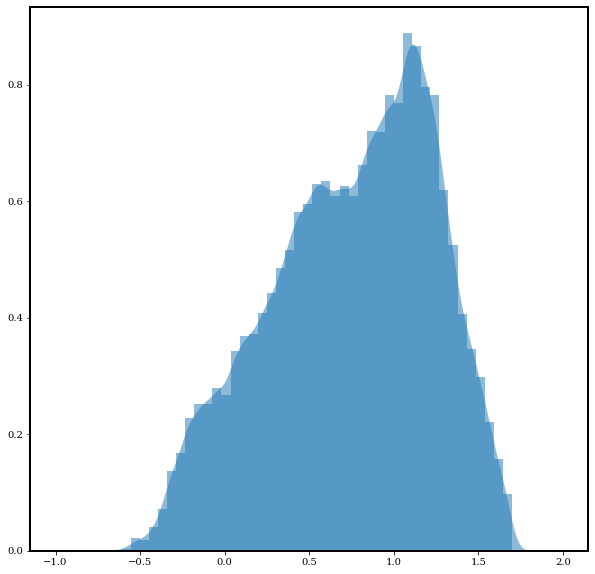

In [8]:
plt.figure(figsize=(10,10))
plt.hist(bpmag-rpmag, bins=50,density=True,alpha=0.5)
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
x= bpmag-rpmag

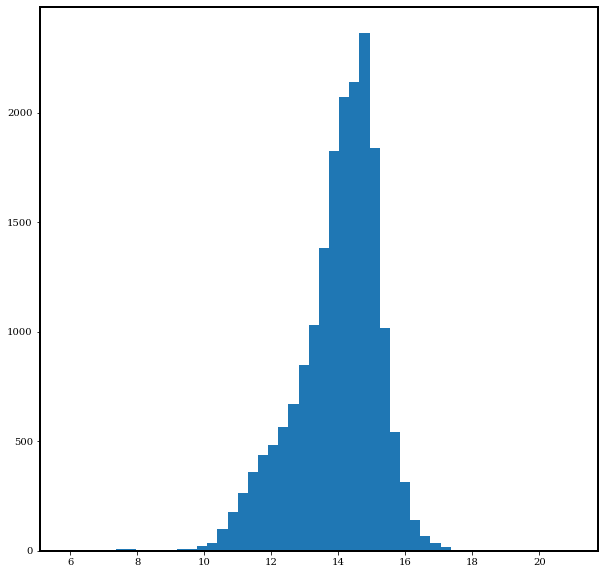

In [9]:
plt.figure(figsize=(10,10))
plt.hist(gmag, bins=50)
x= gmag

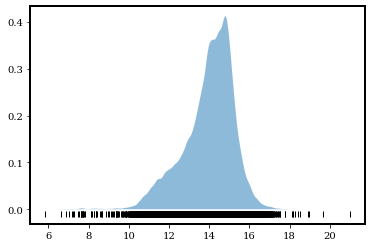

In [10]:
kde = KernelDensity(bandwidth=.1, kernel='gaussian')
kde.fit(x[:, None])
x_d = np.linspace(6,18,2000)
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

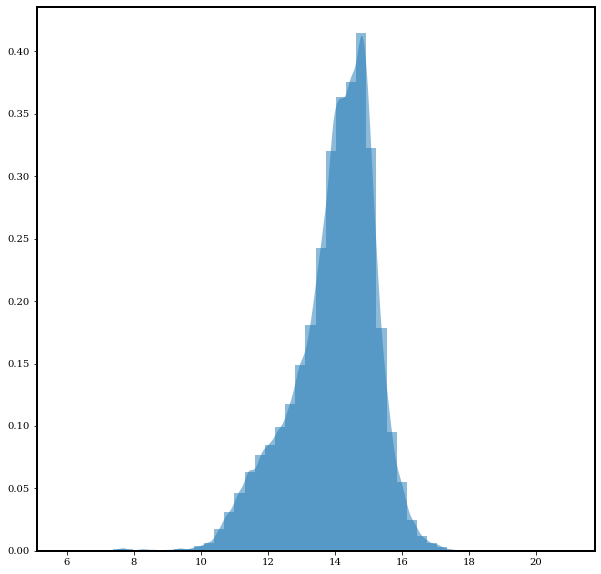

In [11]:
plt.figure(figsize=(10,10))
plt.hist(gmag, bins=50,density=True,alpha=0.5)
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
x= bpmag-rpmag

0.41260437660502897


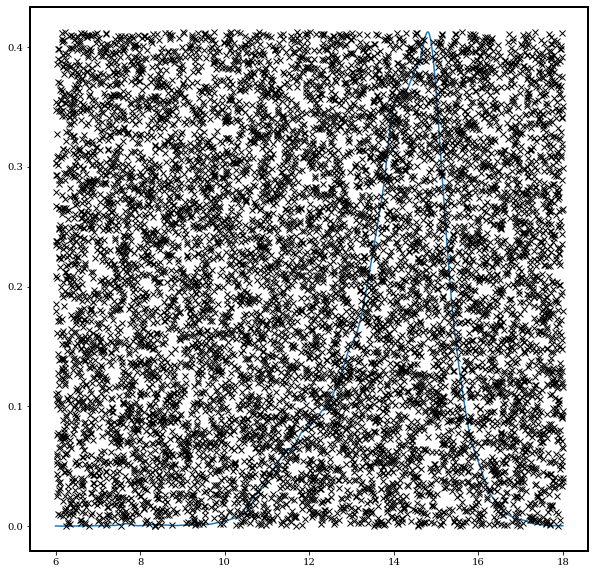

In [12]:
plt.figure(figsize=(10,10))
s = np.random.uniform(0,max(np.exp(logprob)),10000)
indexes = np.linspace(0,1999,2000)
xvals = np.random.choice(indexes, 10000)
newx_d = []
for el in xvals:
    newx_d.append(x_d[int(el)])
    
plt.plot(x_d, np.exp(logprob))
plt.plot(newx_d, s, 'kx')

print(max(np.exp(logprob)))

In [13]:
indexes = np.linspace(0,1999,2000)
el

116.0

In [14]:
# randomly place 10000 points,
#then draw 4
# if del G and del RP is less than 
# then keep

In [2]:
HRDF = pd.read_csv('GMag19.tsv',sep='|',header=None)

#'umag','sgmag','srmag','simag','szmag','prob','teff','logh','mass','teff2','logh2','mass2','rai','dei'
HRDF[10].replace('         ', np.nan, inplace=True)
HRDF[11].replace('         ', np.nan, inplace=True)
HRDF[12].replace('         ', np.nan, inplace=True)
HRDF[7].replace('         ', np.nan, inplace=True)
HRDF = HRDF[HRDF[10].notna()]
HRDF = HRDF[HRDF[11].notna()]
HRDF = HRDF[HRDF[12].notna()]
HRDF = HRDF[HRDF[7].notna()]
gmag = HRDF[10].to_numpy()
bpmag = HRDF[11].to_numpy()
rpmag = HRDF[12].to_numpy()
parallax = HRDF[7].to_numpy()
#JJTimes = (JJDF['Time'].to_numpy()/60/60/24)+2459076.6992445
#print(JJDF)

In [3]:
gmag = gmag + 5*(np.log10(parallax/1000)+1)
wd1219GMAG = 17.561228 + 5*(np.log10(14.2774/1000)+1)
wd1252GMAG = 17.477457+ 5*(np.log10(12.9437/1000)+1)

lawdGMAG = 13.715 + 5*(np.log10(86.4769/1000)+1)

lawd96 = 12.913678 + 5*(np.log10(119.9752/1000)+1)

eggr = 14.247421 + 5*(np.log10(91.9825/1000)+1)

In [4]:
bprpClean = bpmag-rpmag
bprpCleanCut = []
gmagCut = []
for count,element in enumerate(gmag):
    if element < 10:
        if (element-8*bprpClean[count]>10):
            bprpCleanCut.append(bprpClean[count])
            gmagCut.append(element)
            
    if element < 12 and element > 10:
        if (element-4*bprpClean[count]>10):
            bprpCleanCut.append(bprpClean[count])
            gmagCut.append(element)
            
    if element >12:
        if (element-3*bprpClean[count]>10.5):
            bprpCleanCut.append(bprpClean[count])
            gmagCut.append(element)

In [5]:
def equationCalc(x1,x2,y1,y2):
    c = ((y1/x1)-(y2/x2))/((1/x1)-(1/x2))
    m = (y1-c)/x1
    print('y = ',m,'x + ',c)

In [6]:
equationCalc(0.388,17.673635-17.231398,13.46,wd1219GMAG)

equationCalc(17.582787-17.189125,0.287,wd1252GMAG,13.10)
equationCalc(0.287,0.388,13.10,13.46)

y =  -2.314404648510857 x +  14.357989003622214
y =  -0.5836268487393318 x +  13.267500905588188
y =  3.564356435643583 x +  12.077029702970291


In [7]:
bprpClean = bpmag-rpmag
bprpCleanSuper = []
gmagSuper = []
for count,element in enumerate(gmag):
    if (element+2.314404648510857*bprpClean[count]<14.357989003622214):
        if (element-6.1085834692522605*bprpClean[count] > 10.633032007386987):
            if (element+0.5836268487393318*bprpClean[count] > 13.267500905588188):
                if (element-3.564356435643583*bprpClean[count] < 12.077029702970291):
                    bprpCleanSuper.append(bprpClean[count])
                    gmagSuper.append(element)
        
            
            


In [8]:
print(len(gmagSuper))
print(len(gmag))
print(100*(len(gmagSuper)/len(gmag)))

690
83724
0.8241364483302279


In [9]:
Cooling1 = pd.read_csv('cooling/m0.4gridread',sep=',')
print(list(Cooling1))
CoolingG1 = Cooling1['G']
CoolingX1 = Cooling1['G_BP']-Cooling1['G_RP']


Cooling2 = pd.read_csv('cooling/m0.5gridread',sep=',')
print(list(Cooling1))
CoolingG2 = Cooling2['G']
CoolingX2 = Cooling2['G_BP']-Cooling2['G_RP']


Cooling3 = pd.read_csv('cooling/m0.6gridread',sep=',')
print(list(Cooling3))
CoolingG3 = Cooling3['G']
CoolingX3 = Cooling3['G_BP']-Cooling3['G_RP']


Cooling4 = pd.read_csv('cooling/m0.7gridread',sep=',')
print(list(Cooling4))
CoolingG4 = Cooling4['G']
CoolingX4 = Cooling4['G_BP']-Cooling4['G_RP']


Cooling5 = pd.read_csv('cooling/m0.8gridread',sep=',')
print(list(Cooling5))
CoolingG5 = Cooling5['G']
CoolingX5 = Cooling5['G_BP']-Cooling5['G_RP']
#JJTimes = (JJDF['Time'].to_numpy()/60/60/24)+2459076.6992445


['G', 'G_BP', 'G_RP']
['G', 'G_BP', 'G_RP']
['G', 'G_BP', 'G_RP']
['G', 'G_BP', 'G_RP']
['G', 'G_BP', 'G_RP']


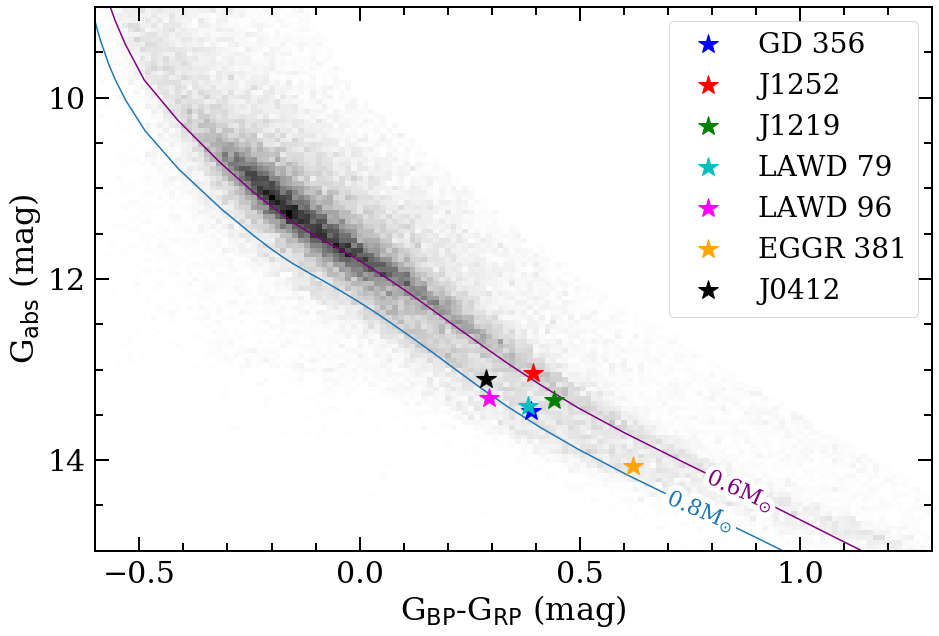

In [11]:
fig, axs = plt.subplots(1, 1,figsize=(15,10))
from pylab import *
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
rc('axes', linewidth=2)
rcParams["axes.axisbelow"] = False
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
#axs.plot(CoolingX1, CoolingG1)
#axs.plot(CoolingX2, CoolingG2)
axs.plot(CoolingX3, CoolingG3, c='purple')
#axs.plot(CoolingX4, CoolingG4)
axs.plot(CoolingX5, CoolingG5)
#axs.add_patch(patches.Rectangle(xy=(0.8, 14.10), width=0.36, height=0.5, angle=22,facecolor = 'white',zorder=3))
#axs.add_patch(patches.Rectangle(xy=(0.6, 14.5), width=0.4, height=0.25, angle=23,facecolor = 'w',zorder=3))
#axs.plot(bpmag-rpmag, gmag, marker=',',ls='', color='black', alpha=0.2)#, mfc='none')
#axs.plot(bprpCleanCut, gmagCut, marker=',',ls='', color='black', alpha=0.2,zorder=4)#, mfc='none')
axs.hist2d(bprpCleanCut, gmagCut, bins=250, cmap='binary', zorder=2)
#axs.plot(bprpCleanSuper, gmagSuper, marker=',',ls='', color='black', alpha=0.2)#, mfc='none')
axs.plot([0.388],[13.46],'b*',label='GD 356',ms=20,zorder=99)
axs.plot([17.582787-17.189125], [wd1252GMAG], 'r*',label="J1252",ms=20,zorder=99)#WDJ125230.93-023417.72
axs.plot([17.673635-17.231398],[wd1219GMAG],'g*', label="J1219",ms=20,zorder=99)#WDJ121929.50+471522.94

axs.plot([13.724510-13.342167],[lawdGMAG],'c*', label="LAWD 79",ms=20,zorder=99)#WDJ121929.50+471522.94
axs.plot([12.994309-12.701542],[lawd96], marker='*',ls='',c='magenta', label="LAWD 96",ms=20,zorder=99)
axs.plot([14.470383-13.849409],[eggr], marker='*',ls='',c='orange', label="EGGR 381",ms=20,zorder=99)
axs.plot([0.287],[13.10],'k*',label='J0412',ms=20,zorder=99)#WDJ041246.85+754942.26
#axs.gca().invert_yaxis()
axs.legend(prop={'size': 28},loc='best')
axs.set_ylim(15,9)
axs.set_xlim(-0.6,1.2999)
axs.set_ylabel(r"G$_{\rm abs}$ (mag)", fontsize=32)
#axs.set_ylabel(r"$M_G = G + 5\times{\rm log}\bar{\omega} - 10$ (mag)", fontsize=32)
axs.set_xlabel(r"G$_{\rm BP}$-G$_{\rm RP}$ (mag)", fontsize=32)

axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
#axs.yaxis.set_major_locator(MultipleLocator(0.06))
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in",zorder=100)
axs.tick_params(axis='x',which='both', width=2,direction='in',zorder=100)
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10,zorder=100)
axs.yaxis.set_major_locator(MultipleLocator(2))
axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.tick_params(axis='x',which='minor', length=8,zorder=100)
axs.tick_params(axis='y',which='minor', length=8,direction='in',zorder=100)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 


axs.annotate(r"0.6M$_{\odot}$", xy=(0.78, 14.56), fontsize=22,rotation=-24,c='purple',zorder=99,path_effects=[PathEffects.withStroke(linewidth=11,foreground="w")])
#tex.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))
axs.annotate(r"0.8M$_{\odot}$", xy=(0.69, 14.78), fontsize=22,rotation=-23,c='C0',zorder=99,path_effects=[PathEffects.withStroke(linewidth=11,foreground="w")])
#C0

#axs.plot([-0.5,0,0.5,1.5],[6,10,12,15])
bboxx = transforms.Bbox([[0.66, 0.24], [13.56, 8.84]])#285->288 #15.15->
#plt.savefig('G19MagSampleAlt.pdf', bbox_inches=bboxx ) 

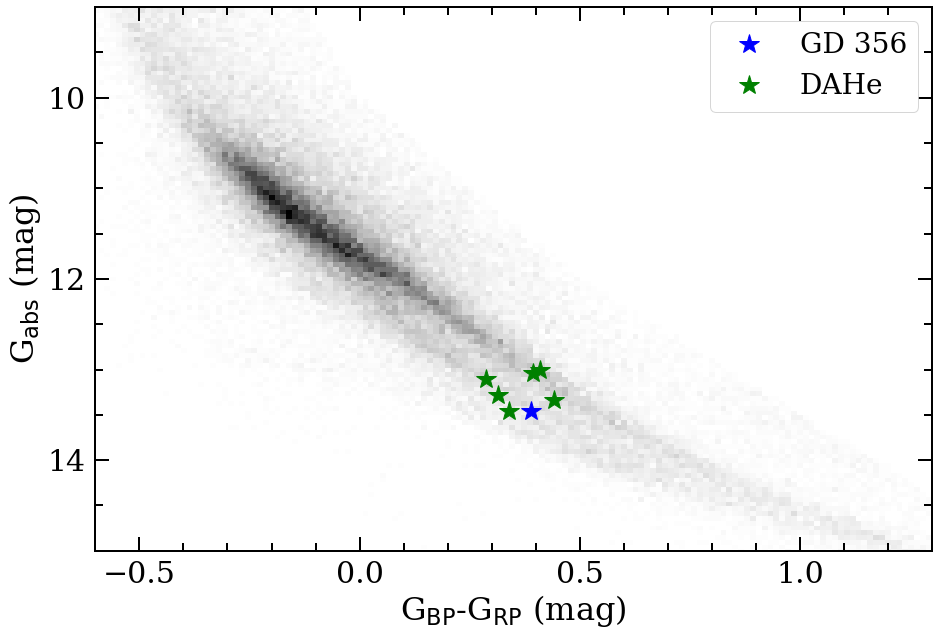

In [31]:
fig, axs = plt.subplots(1, 1,figsize=(15,10))
from pylab import *
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
rc('axes', linewidth=2)
rcParams["axes.axisbelow"] = False
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
#axs.plot(CoolingX1, CoolingG1)
#axs.plot(CoolingX2, CoolingG2)
#axs.plot(CoolingX3, CoolingG3, c='purple')
#axs.plot(CoolingX4, CoolingG4)
#axs.plot(CoolingX5, CoolingG5)
#axs.add_patch(patches.Rectangle(xy=(0.8, 14.10), width=0.36, height=0.5, angle=22,facecolor = 'white',zorder=3))
#axs.add_patch(patches.Rectangle(xy=(0.6, 14.5), width=0.4, height=0.25, angle=23,facecolor = 'w',zorder=3))
#axs.plot(bpmag-rpmag, gmag, marker=',',ls='', color='black', alpha=0.2)#, mfc='none')
#axs.plot(bprpCleanCut, gmagCut, marker=',',ls='', color='black', alpha=0.2,zorder=4)#, mfc='none')
axs.hist2d(bprpCleanCut, gmagCut, bins=250, cmap='binary', zorder=2)
#axs.plot(bprpCleanSuper, gmagSuper, marker=',',ls='', color='black', alpha=0.2)#, mfc='none')
axs.plot([0.388],[13.46],'b*',label='GD 356',ms=20,zorder=99)

#axs.gca().invert_yaxis()

axs.set_ylim(15,9)
axs.set_xlim(-0.6,1.2999)
axs.set_ylabel(r"G$_{\rm abs}$ (mag)", fontsize=32)
#axs.set_ylabel(r"$M_G = G + 5\times{\rm log}\bar{\omega} - 10$ (mag)", fontsize=32)
axs.set_xlabel(r"G$_{\rm BP}$-G$_{\rm RP}$ (mag)", fontsize=32)

axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
#axs.yaxis.set_major_locator(MultipleLocator(0.06))
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in",zorder=100)
axs.tick_params(axis='x',which='both', width=2,direction='in',zorder=100)
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10,zorder=100)
axs.yaxis.set_major_locator(MultipleLocator(2))
axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.tick_params(axis='x',which='minor', length=8,zorder=100)
axs.tick_params(axis='y',which='minor', length=8,direction='in',zorder=100)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
color = 'green'
marker = '*'
ms = 20
axs.xaxis.set_ticks_position('both') 
axs.plot([0.338],[13.46],c=color, marker=marker, ls='', ms=ms)
axs.plot([17.582787-17.189125],[13.037749],c=color, marker=marker, ls='', ms=ms)
axs.plot([17.673635-17.231398],[13.3344736],c=color, marker=marker, ls='', ms=ms)
axs.plot([0.287],[13.10],c=color, marker=marker, ls='',ms=ms)
#1252 gmag = 17.4550, bp=17.6113, rp=17.2011, par=12.8619
axs.plot([17.6113-17.2011],[17.4550+ 5*(np.log10(12.8619/1000)+1)],c=color, marker=marker, ls='',ms=ms)
#lp par=18.9865,gmag=16.8881,bp=16.9889,rp=16.6748
axs.plot([16.9889-16.6748],[16.8881+ 5*(np.log10(18.9865/1000)+1)],c=color, marker=marker,ms=ms, ls='', label='DAHe')

#axs.annotate(r"0.6M$_{\odot}$", xy=(0.78, 14.56), fontsize=22,rotation=-24,c='purple',zorder=99,path_effects=[PathEffects.withStroke(linewidth=11,foreground="w")])
#tex.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))
#axs.annotate(r"0.8M$_{\odot}$", xy=(0.69, 14.78), fontsize=22,rotation=-23,c='C0',zorder=99,path_effects=[PathEffects.withStroke(linewidth=11,foreground="w")])
#C0
axs.legend(prop={'size': 28},loc='best')
#axs.plot([-0.5,0,0.5,1.5],[6,10,12,15])
bboxx = transforms.Bbox([[0.66, 0.2], [13.56, 8.84]])#285->288 #15.15->
plt.savefig('G19MagSampleHRDv6.pdf', bbox_inches=bboxx ) 

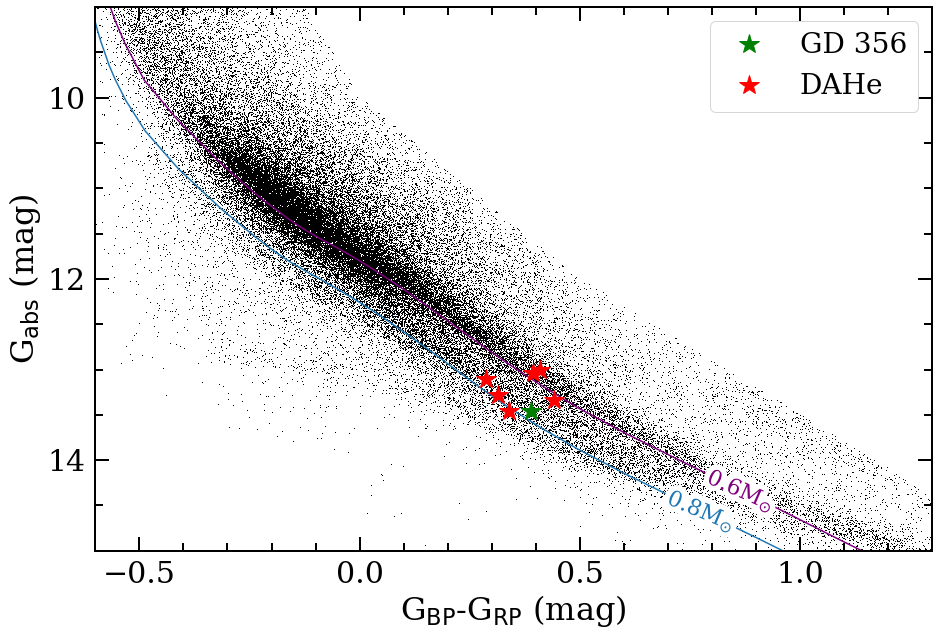

In [19]:
fig, axs = plt.subplots(1, 1,figsize=(15,10))
from pylab import *
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
rc('axes', linewidth=2)
rcParams["axes.axisbelow"] = False
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']

#axs.add_patch(patches.Rectangle(xy=(0.8, 14.10), width=0.36, height=0.5, angle=22,facecolor = 'white',zorder=3))
#axs.add_patch(patches.Rectangle(xy=(0.6, 14.5), width=0.4, height=0.25, angle=23,facecolor = 'w',zorder=3))
#axs.plot(bpmag-rpmag, gmag, marker=',',ls='', color='black', alpha=0.2)#, mfc='none')
#axs.plot(bprpCleanCut, gmagCut, marker=',',ls='', color='black', alpha=0.2,zorder=4)#, mfc='none')
axs.plot(bprpCleanCut, gmagCut, 'k,')
#axs.plot(bprpCleanSuper, gmagSuper, marker=',',ls='', color='black', alpha=0.2)#, mfc='none')
axs.plot([0.388],[13.46],'g*',label='GD 356',ms=20,zorder=99)

#axs.gca().invert_yaxis()
axs.set_ylim(15,9)
axs.set_xlim(-0.6,1.2999)
axs.set_ylabel(r"G$_{\rm abs}$ (mag)", fontsize=32)
#axs.set_ylabel(r"$M_G = G + 5\times{\rm log}\bar{\omega} - 10$ (mag)", fontsize=32)
axs.set_xlabel(r"G$_{\rm BP}$-G$_{\rm RP}$ (mag)", fontsize=32)

axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
#axs.yaxis.set_major_locator(MultipleLocator(0.06))
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in",zorder=100)
axs.tick_params(axis='x',which='both', width=2,direction='in',zorder=100)
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10,zorder=100)
axs.yaxis.set_major_locator(MultipleLocator(2))
axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.tick_params(axis='x',which='minor', length=8,zorder=100)
axs.tick_params(axis='y',which='minor', length=8,direction='in',zorder=100)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
axs.plot(CoolingX3, CoolingG3, c='purple')
#axs.plot(CoolingX4, CoolingG4)
axs.plot(CoolingX5, CoolingG5)

axs.annotate(r"0.6M$_{\odot}$", xy=(0.78, 14.56), fontsize=22,rotation=-24,c='purple',zorder=99,path_effects=[PathEffects.withStroke(linewidth=11,foreground="w")])
#tex.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))
axs.annotate(r"0.8M$_{\odot}$", xy=(0.69, 14.78), fontsize=22,rotation=-23,c='C0',zorder=99,path_effects=[PathEffects.withStroke(linewidth=11,foreground="w")])
axs.plot([0.338],[13.46],'r*', ms=20)
axs.plot([17.582787-17.189125],[13.037749],'r*', ms=20)
axs.plot([17.673635-17.231398],[13.3344736], 'r*', ms=20)
axs.plot([0.287],[13.10],'r*',ms=20)
#1252 gmag = 17.4550, bp=17.6113, rp=17.2011, par=12.8619
axs.plot([17.6113-17.2011],[17.4550+ 5*(np.log10(12.8619/1000)+1)],'r*',ms=20)
#lp par=18.9865,gmag=16.8881,bp=16.9889,rp=16.6748
axs.plot([16.9889-16.6748],[16.8881+ 5*(np.log10(18.9865/1000)+1)], 'r*',ms=20, label='DAHe')
axs.legend(prop={'size': 28},loc='best')

plt.savefig('G19MagGAll.png') 

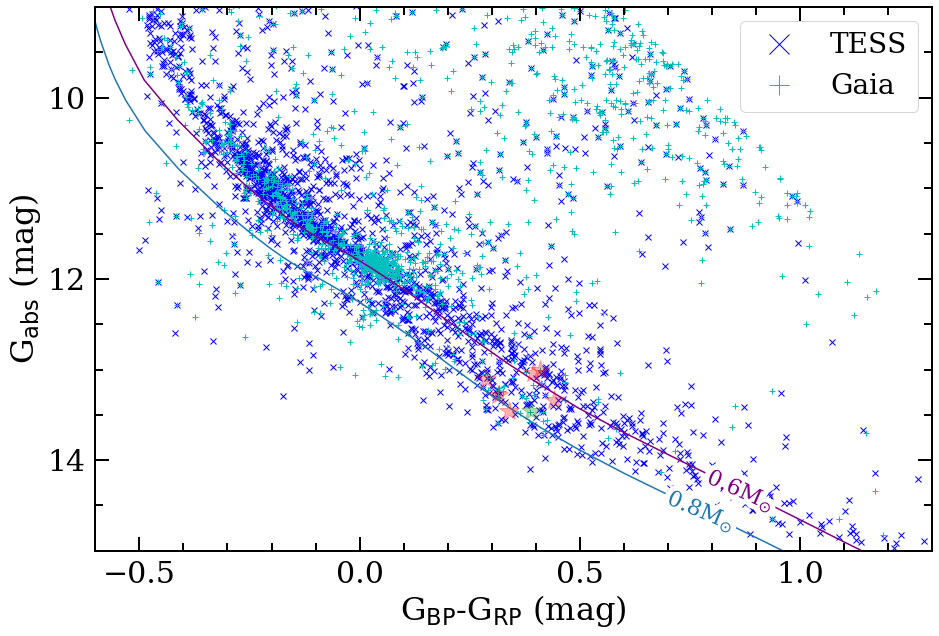

In [28]:
fig, axs = plt.subplots(1, 1,figsize=(15,10))
from pylab import *
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
rc('axes', linewidth=2)
rcParams["axes.axisbelow"] = False
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']

BPRPGaiaVariable = np.load('BPRPGaiaVariable.npy')

GmagGaiaVariable = np.load('GmagGaiaVariable.npy')

BPRPTessVariable = np.load('BPRPTessVariable.npy')

GmagTessVariable = np.load('GmagTessVariable.npy')
axs.plot([-99],[-99], 'bx', label='TESS', ms=20)
axs.plot([-99],[-99], 'c+', label='Gaia', ms=20)
axs.plot(BPRPTessVariable, GmagTessVariable, 'bx')
axs.plot(BPRPGaiaVariable, GmagGaiaVariable, 'c+')
#axs.plot(bprpCleanSuper, gmagSuper, marker=',',ls='', color='black', alpha=0.2)#, mfc='none')
axs.plot([0.388],[13.46],'g*',ms=20,zorder=99, alpha=0.3)

#axs.gca().invert_yaxis()
axs.set_ylim(15,9)
axs.set_xlim(-0.6,1.2999)
axs.set_ylabel(r"G$_{\rm abs}$ (mag)", fontsize=32)
#axs.set_ylabel(r"$M_G = G + 5\times{\rm log}\bar{\omega} - 10$ (mag)", fontsize=32)
axs.set_xlabel(r"G$_{\rm BP}$-G$_{\rm RP}$ (mag)", fontsize=32)

axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
#axs.yaxis.set_major_locator(MultipleLocator(0.06))
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in",zorder=100)
axs.tick_params(axis='x',which='both', width=2,direction='in',zorder=100)
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10,zorder=100)
axs.yaxis.set_major_locator(MultipleLocator(2))
axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.tick_params(axis='x',which='minor', length=8,zorder=100)
axs.tick_params(axis='y',which='minor', length=8,direction='in',zorder=100)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
axs.plot(CoolingX3, CoolingG3, c='purple')
#axs.plot(CoolingX4, CoolingG4)
axs.plot(CoolingX5, CoolingG5)

axs.annotate(r"0.6M$_{\odot}$", xy=(0.78, 14.56), fontsize=22,rotation=-24,c='purple',zorder=99,path_effects=[PathEffects.withStroke(linewidth=11,foreground="w")])
#tex.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))
axs.annotate(r"0.8M$_{\odot}$", xy=(0.69, 14.78), fontsize=22,rotation=-23,c='C0',zorder=99,path_effects=[PathEffects.withStroke(linewidth=11,foreground="w")])
axs.plot([0.338],[13.46],'r*', ms=20, alpha=0.3)
axs.plot([17.582787-17.189125],[13.037749],'r*', ms=20, alpha=0.3)
axs.plot([17.673635-17.231398],[13.3344736], 'r*', ms=20, alpha=0.3)
axs.plot([0.287],[13.10],'r*',ms=20, alpha=0.3)
#1252 gmag = 17.4550, bp=17.6113, rp=17.2011, par=12.8619
axs.plot([17.6113-17.2011],[17.4550+ 5*(np.log10(12.8619/1000)+1)],'r*',ms=20, alpha=0.3)
#lp par=18.9865,gmag=16.8881,bp=16.9889,rp=16.6748
axs.plot([16.9889-16.6748],[16.8881+ 5*(np.log10(18.9865/1000)+1)], 'r*',ms=20, alpha=0.3)
axs.legend(prop={'size': 28},loc='best')

plt.savefig('G19MagGVariable.png') 

In [5]:
print(min(bpmag-rpmag))
print(max(bpmag-rpmag))
print(min(gmag))
print(max(gmag))

-1.630560000000001
1.6994819999999997
4.999923120838725
18.266967288411948


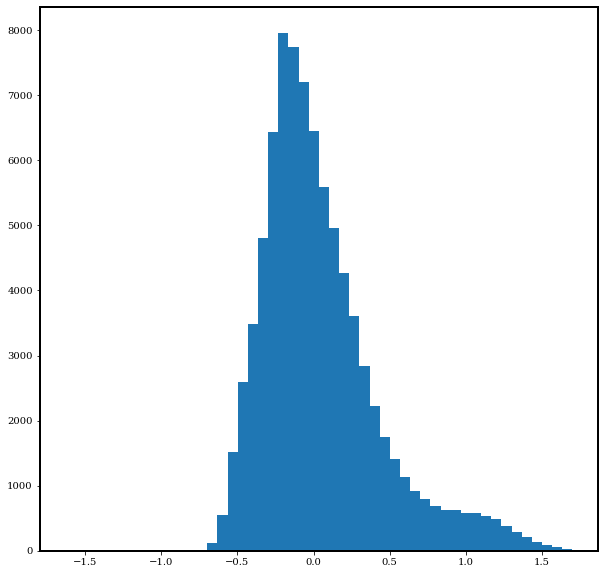

In [18]:
plt.figure(figsize=(10,10))
plt.hist(bpmag-rpmag, bins=50)
xbp= bpmag-rpmag

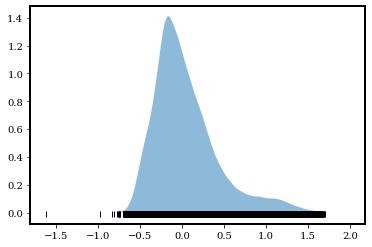

In [19]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=.04, kernel='gaussian')
kde.fit(xbp[:, None])
x_dbp = np.linspace(-1,2,2000)
# score_samples returns the log of the probability density
logprobbp = kde.score_samples(x_dbp[:, None])

plt.fill_between(x_dbp, np.exp(logprobbp), alpha=0.5)
plt.plot(xbp, np.full_like(xbp, -0.01), '|k', markeredgewidth=1)

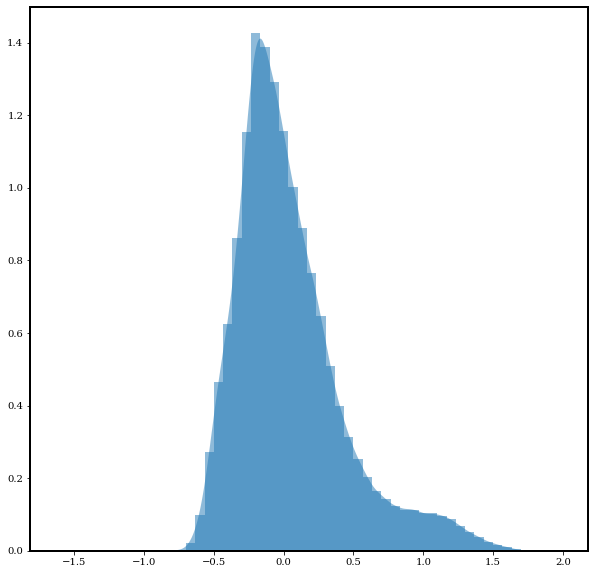

In [20]:
plt.figure(figsize=(10,10))
plt.hist(bpmag-rpmag, bins=50,density=True,alpha=0.5)
plt.fill_between(x_dbp, np.exp(logprobbp), alpha=0.5)

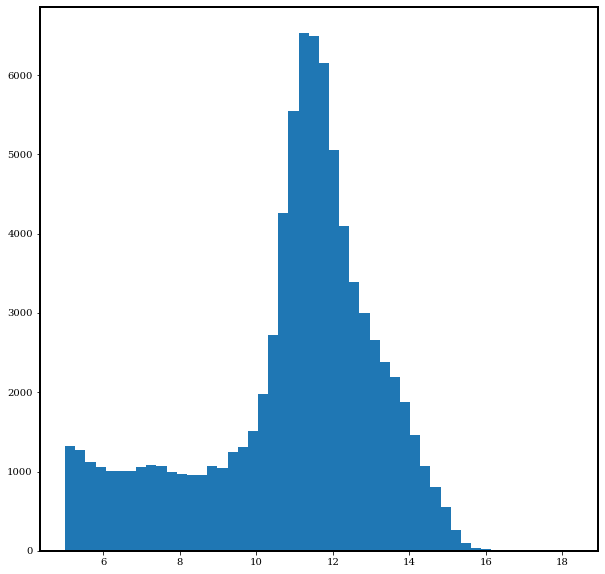

In [21]:
plt.figure(figsize=(10,10))
plt.hist(gmag, bins=50)
xg = gmag

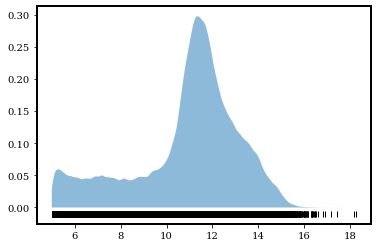

In [22]:
kde = KernelDensity(bandwidth=.1, kernel='gaussian')
kde.fit(xg[:, None])
x_dg = np.linspace(5,18,2000)
# score_samples returns the log of the probability density
logprobg = kde.score_samples(x_dg[:, None])

plt.fill_between(x_dg, np.exp(logprobg), alpha=0.5)
plt.plot(xg, np.full_like(xg, -0.01), '|k', markeredgewidth=1)

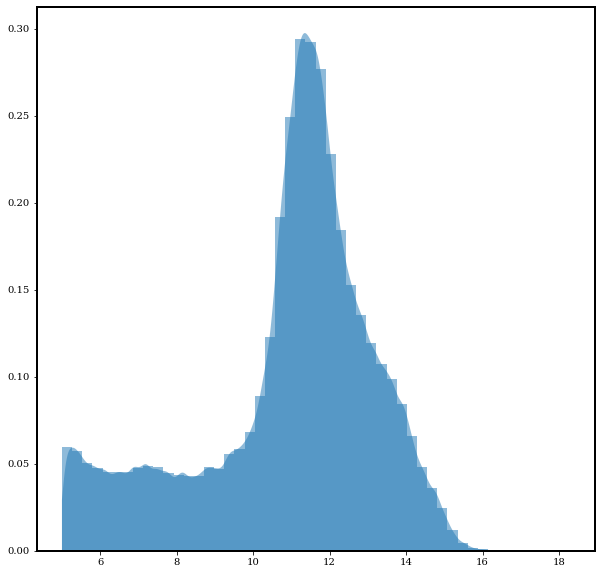

In [23]:
plt.figure(figsize=(10,10))
plt.hist(gmag, bins=50,density=True,alpha=0.5)
plt.fill_between(x_dg, np.exp(logprobg), alpha=0.5)


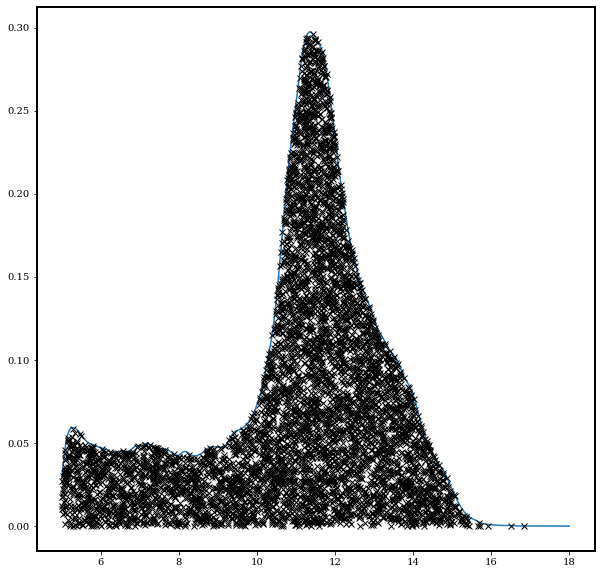

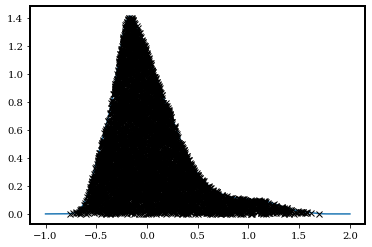

In [24]:
plt.figure(figsize=(10,10))
indexes = np.linspace(0,1999,2000)
keepxg= []
keepyg= []
keepxbp= []
keepybp= []
for i in range(100000):
    s = np.random.uniform(0,max(np.exp(logprobg)),1)[0]
    bp = np.random.uniform(0,max(np.exp(logprobbp)),1)[0]
    xvals = np.random.choice(indexes, 1)[0]
    xvals2 = np.random.choice(indexes, 1)[0]
    if s <= np.exp(logprobg)[int(xvals)] and bp <= np.exp(logprobbp)[int(xvals2)]:
        keepxg.append(x_dg[int(xvals)])
        keepyg.append(s)
        keepxbp.append(x_dbp[int(xvals2)])
        keepybp.append(bp)



plt.plot(x_dg, np.exp(logprobg))
plt.plot(keepxg, keepyg, 'kx')
plt.show()
plt.plot(x_dbp, np.exp(logprobbp))
plt.plot(keepxbp, keepybp, 'kx')

In [25]:
wd1252GMAG-13.46

-0.42225080694023553

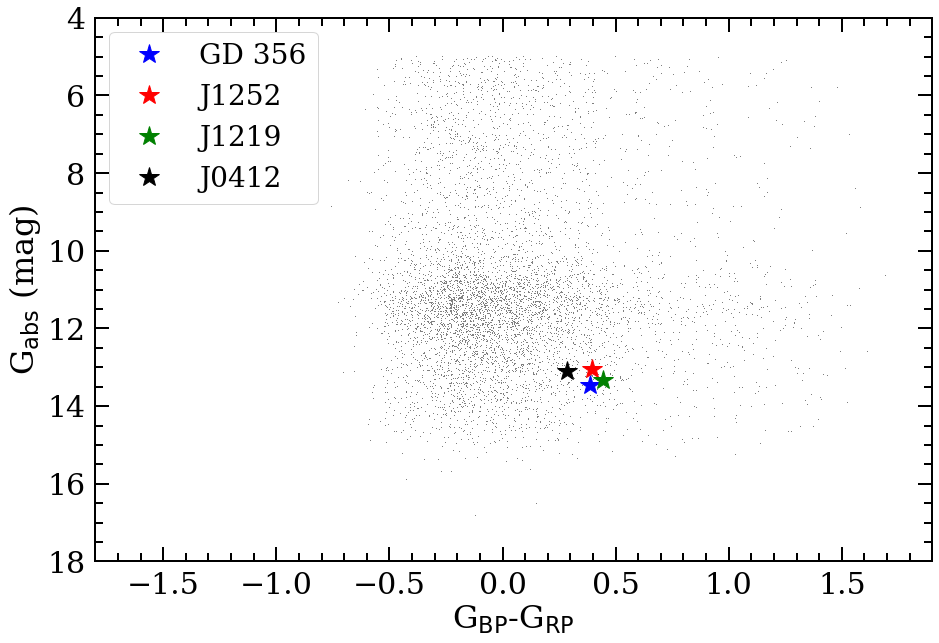

In [26]:
fig, axs = plt.subplots(1, 1,figsize=(15,10))
from pylab import *
rc('axes', linewidth=2)
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
axs.plot(keepxbp, keepxg, marker=',',ls='',c='gray')
axs.plot([0.388],[13.46],'b*',label='GD 356',ms=20)
axs.plot([17.582787-17.189125], [wd1252GMAG], 'r*',label="J1252",ms=20)#WDJ125230.93-023417.72
axs.plot([17.673635-17.231398],[wd1219GMAG],'g*', label="J1219",ms=20)#WDJ121929.50+471522.94

axs.plot([0.287],[13.10],'k*',label='J0412',ms=20)#WDJ041246.85+754942.26
#axs.gca().invert_yaxis()
axs.legend(prop={'size': 28},loc='best')
axs.set_ylim(18,4)
axs.set_ylabel(r"G$_{\rm abs}$ (mag)", fontsize=32)
axs.set_xlabel(r"G$_{\rm BP}$-G$_{\rm RP}$", fontsize=32)

axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
#axs.yaxis.set_major_locator(MultipleLocator(0.06))
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in")
axs.tick_params(axis='x',which='both', width=2,direction='in')
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
axs.yaxis.set_major_locator(MultipleLocator(2))
axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.tick_params(axis='x',which='minor', length=8)
axs.tick_params(axis='y',which='minor', length=8,direction='in')
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
axs.set_xlim(-1.8,1.9)

bboxx = transforms.Bbox([[0.66, 0.24], [13.56, 8.98]])#285->288 #15.15->
#plt.savefig('100PcSample.pdf', bbox_inches=bboxx ) 



In [55]:
x = bprpCleanCut
y = gmagCut#bprpCleanCut, gmagCut
data = np.vstack([x, y])
kde = gaussian_kde(data,bw_method=0.04)
#-1.630560000000001



xgrid = np.linspace(-1.630560000000001, 1.6994819999999997, 400) #200
ygrid = np.linspace(18.266967288411948, 4.999923120838725, 400)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

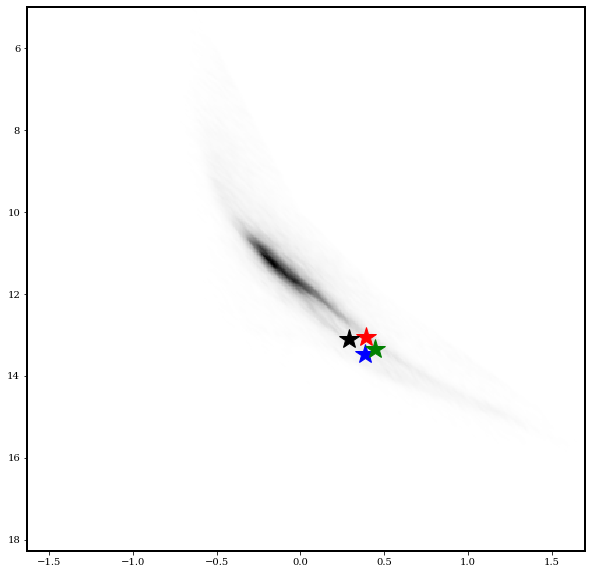

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(Z.reshape(Xgrid.shape),
                   origin='lower', aspect='auto',
                   extent=[-1.630560000000001, 1.6994819999999997, 18.266967288411948, 4.999923120838725],
                   cmap='Greys')

plt.plot([0.388],[13.46],'b*',label='GD 356',ms=20)
plt.plot([17.582787-17.189125], [wd1252GMAG], 'r*',label="J1252",ms=20)#WDJ125230.93-023417.72
plt.plot([17.673635-17.231398],[wd1219GMAG],'g*', label="J1219",ms=20)#WDJ121929.50+471522.94

plt.plot([0.287],[13.10],'k*',label='J0412',ms=20)#WDJ041246.85+754942.26

In [57]:
len(Z)

160000

In [58]:
indexes = np.linspace(0,159999,160000)
xvals = np.random.choice(indexes, 10000000)
s = np.random.uniform(0,max(Z),10000000)
passed = []
for i in range(10000000):
    if s[i] <= Z[int(xvals[i])]:
        passed.append(int(xvals[i]))

In [59]:
len(passed)


105383

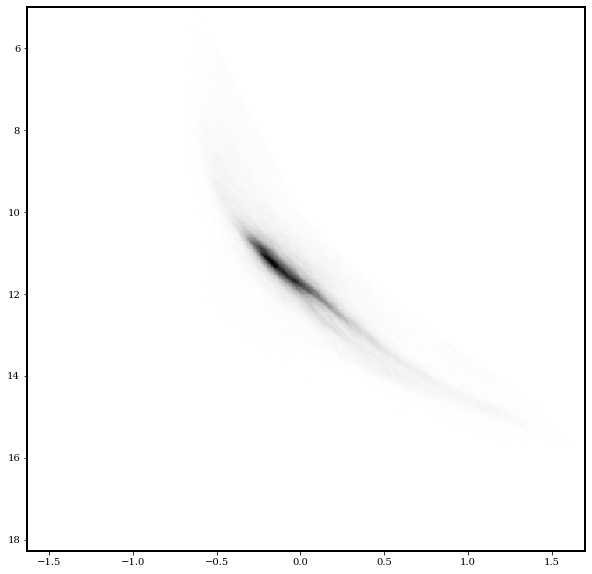

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(Z.reshape(Xgrid.shape),
                   origin='lower', aspect='auto',
                   extent=[-1.630560000000001, 1.6994819999999997, 18.266967288411948, 4.999923120838725],
                   cmap='Greys')

In [61]:
Zpassed = np.zeros(160000)
for el in passed:
    Zpassed[el] +=1

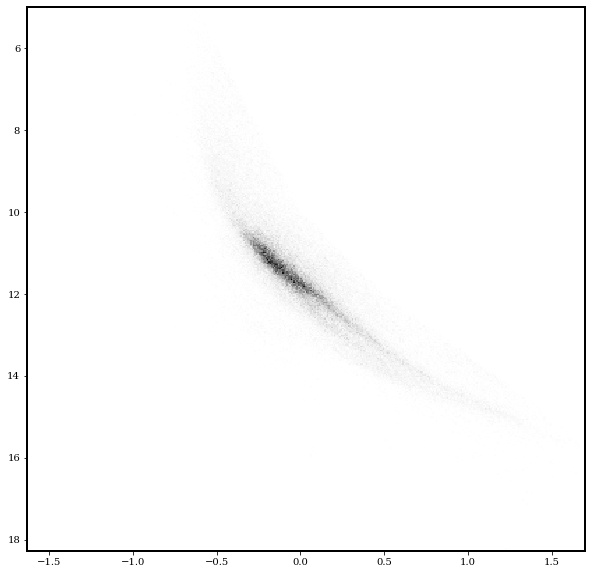

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(Zpassed.reshape(Xgrid.shape),
                   origin='lower', aspect='auto',
                   extent=[-1.630560000000001, 1.6994819999999997, 18.266967288411948, 4.999923120838725],
                   cmap='Greys')

In [63]:
Zpassed = Zpassed/max(Zpassed)

In [64]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [65]:
np.cumsum(Zpassed)

array([   0.        ,    0.        ,    0.        , ..., 1351.06410256,
       1351.06410256, 1351.06410256])

In [66]:
from numba import jit

In [18]:

@jit
def main(rangeval):
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx
    ZpassedSum = np.cumsum(Zpassed)
    countDistance = 0
    XGridF = Xgrid.flatten()
    YGridF = Ygrid.flatten()
    passed = 0
    for i in range(rangeval):
        val = np.random.uniform(0,1847.78947368,1)[0]
        idx1 = find_nearest(ZpassedSum, val)
        xval1 = XGridF[int(idx1)]
        yval1 = YGridF[int(idx1)]
        val = np.random.uniform(0,1847.78947368,1)[0]
        idx2 = find_nearest(ZpassedSum, val)
        xval2 = XGridF[int(idx2)]
        yval2 = YGridF[int(idx2)]
        val = np.random.uniform(0,1847.78947368,1)[0]
        idx3 = find_nearest(ZpassedSum, val)
        xval3 = XGridF[int(idx3)]
        yval3 = YGridF[int(idx3)]
        val = np.random.uniform(0,1847.78947368,1)[0]
        idx4 = find_nearest(ZpassedSum, val)
        xval4 = XGridF[int(idx4)]
        yval4 = YGridF[int(idx4)]
        pointsX = [xval1,xval2,xval3,xval4]
        pointsY = [yval1,yval2,yval3,yval4]
        maxXDif = np.abs(max(pointsX)-min(pointsX))
        maxYDif = np.abs(max(pointsY)-min(pointsY))
        if maxXDif <= 0.155237 and maxYDif <= 0.42225080694023553:
            passed +=1
    print(passed/1000000)

In [19]:
main(1000000)

0.00053


In [67]:

@jit
def main(rangeval):
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx
    ZpassedSum = np.cumsum(Zpassed)
    countDistance = 0
    XGridF = Xgrid.flatten()
    YGridF = Ygrid.flatten()
    passed = 0
    for i in range(rangeval):
        val = np.random.uniform(0,1847.78947368,1)[0]
        idx1 = find_nearest(ZpassedSum, val)
        xval1 = XGridF[int(idx1)]
        yval1 = YGridF[int(idx1)]
        val = np.random.uniform(0,1847.78947368,1)[0]
        idx2 = find_nearest(ZpassedSum, val)
        xval2 = XGridF[int(idx2)]
        yval2 = YGridF[int(idx2)]
        val = np.random.uniform(0,1847.78947368,1)[0]
        idx3 = find_nearest(ZpassedSum, val)
        xval3 = XGridF[int(idx3)]
        yval3 = YGridF[int(idx3)]
        val = np.random.uniform(0,1847.78947368,1)[0]
        idx4 = find_nearest(ZpassedSum, val)
        xval4 = XGridF[int(idx4)]
        yval4 = YGridF[int(idx4)]
        pointsX = [xval1,xval2,xval3,xval4]
        pointsY = [yval1,yval2,yval3,yval4]
        maxXDif = np.abs(max(pointsX)-min(pointsX))
        maxYDif = np.abs(max(pointsY)-min(pointsY))
        if maxXDif <= 0.310474 and maxYDif <= 0.8445016138804711:
            passed +=1
    print(passed/1000000)

In [68]:
main(1000000)

0.011746


In [78]:
0.42225080694023553*2

0.8445016138804711

In [124]:
indexes = np.linspace(0,199,20)
xvals = np.array(np.random.choice(indexes, 8),dtype=int)
distanceOk = 0
for i in range(1000000):
    pointsX = [Xgrid[xvals[0],xvals[1]],Xgrid[xvals[2],xvals[3]],Xgrid[xvals[4],xvals[5]],Xgrid[xvals[6],xvals[7]]]
    pointsY = [Ygrid[xvals[0]][0], Ygrid[xvals[2]][0], Ygrid[xvals[4]][0], Ygrid[xvals[6]][0]]
    maxXDif = np.abs(max(pointsX)-min(pointsX))
    maxYDif = np.abs(max(pointsY)-min(pointsY))
    if maxXDif <= 0.155237 and maxYDif <= 0.42225080694023553:
        distanceOk +=1
        
print('final proba: ', distanceOk/10000)

final proba:  0.0


In [115]:
ZpassedRe = Zpassed.reshape(Xgrid.shape)/np.max(Zpassed)
print(np.shape(ZpassedRe))

(200, 200)


In [119]:
ZpassedRe[xvals[0],xvals[1]]

0.01509433962264151

In [123]:
s = np.random.uniform(0,1,1)[0]
s

0.2460525021165334

In [1]:
from astroquery.gaia import Gaia

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
job = Gaia.launch_job_async("""
SELECT g3.source_id, g3.ra, g3.dec, g3.parallax, g3.parallax_error, g3.parallax_over_error,
g3.pmra, g3.pmra_error, g3.pmdec, g3.pmdec_error, g3.phot_g_mean_mag, g3.bp_rp,
t1.source_id, t1.ra, t1.dec, t1.parallax, t1.parallax_error, t1.parallax_over_error,
t1.pmra, t1.pmra_error, t1.pmdec, t1.pmdec_error, t1.target_id,
0.01745* (distance(POINT('ICRS', t1.ra, t1.dec), POINT('ICRS', g3.ra, g3.dec)))/t1.parallax AS variable

FROM gaiadr3.gaia_source AS g3, tap_upload.table_test_w AS t1

WHERE 1 = contains(
   POINT(t1.ra, t1.dec),
   CIRCLE(g3.ra, g3.dec, 0.0114591*t1.parallax)) AND
   
   t1.source_id != g3.source_id AND
   
abs(1/t1.parallax - 1/g3.parallax) -
  2*0.01745*distance(POINT('ICRS', t1.ra,t1.dec),
  POINT('ICRS', g3.ra, g3.dec))/t1.parallax
  < 3*sqrt(power(t1.parallax_error,2)/power(t1.parallax, 4)
   + power(g3.parallax_error, 2)/power(g3.parallax, 4)) AND
   
   
   sqrt(power((t1.pmra - g3.pmra), 2) +power((t1.pmdec - g3.pmdec), 2))
  - (7.42e-3 * power(t1.parallax, 1.5) *
  power(distance(POINT('ICRS', t1.ra, t1.dec), POINT('ICRS', g3.ra, g3.dec)), -0.5))
  < 3*sqrt(((power((t1.pmra_error), 2) + power((g3.pmra_error), 2))
  * power((t1.pmra - g3.pmra), 2)
  + (power((t1.pmdec_error), 2) + power((g3.pmdec_error), 2))
   * power((t1.pmdec - g3.pmdec), 2))/
  (power((t1.pmra - g3.pmra), 2) + power((t1.pmdec - g3.pmdec), 2))) AND
 
sqrt(((power((t1.pmra_error), 2) +power((g3.pmra_error), 2))
  * power((t1.pmra - g3.pmra), 2)
  + (power((t1.pmdec_error), 2) + power((g3.pmdec_error), 2))
  * power((t1.pmdec -g3.pmdec), 2))
  /(power((t1.pmra - g3.pmra),2) +  power((t1.pmdec - g3.pmdec), 2))) < 1.5
 
""", upload_resource='ff.csv', upload_table_name="table_test_w", verbose=True)

Launched query: '
SELECT g3.source_id, g3.ra, g3.dec, g3.parallax, g3.parallax_error, g3.parallax_over_error,
g3.pmra, g3.pmra_error, g3.pmdec, g3.pmdec_error, g3.phot_g_mean_mag, g3.bp_rp,
t1.source_id, t1.ra, t1.dec, t1.parallax, t1.parallax_error, t1.parallax_over_error,
t1.pmra, t1.pmra_error, t1.pmdec, t1.pmdec_error, t1.target_id,
0.01745* (distance(POINT('ICRS', t1.ra, t1.dec), POINT('ICRS', g3.ra, g3.dec)))/t1.parallax AS variable

FROM gaiadr3.gaia_source AS g3, tap_upload.table_test_w AS t1

WHERE 1 = contains(
   POINT(t1.ra, t1.dec),
   CIRCLE(g3.ra, g3.dec, 0.0114591*t1.parallax)) AND
   
   t1.source_id != g3.source_id AND
   
abs(1/t1.parallax - 1/g3.parallax) -
  2*0.01745*distance(POINT('ICRS', t1.ra,t1.dec),
  POINT('ICRS', g3.ra, g3.dec))/t1.parallax
  < 3*sqrt(power(t1.parallax_error,2)/power(t1.parallax, 4)
   + power(g3.parallax_error, 2)/power(g3.parallax, 4)) AND
   
   
   sqrt(power((t1.pmra - g3.pmra), 2) +power((t1.pmdec - g3.pmdec), 2))
  - (7.42e-3 * power

HTTPError: Error 500:
null